## 3. ke 4 file dari 4 tahap crawl menjadi 1 file
Dikarenakan saya melakukan pengambilan data secara bertahap, maka supaya data mudah untuk diolah disini saya menggabungkan 4 file hasil pengambilan data terlebih dahulu

In [ ]:
import pandas as pd
import glob
import os

path_folder = 'CrawlTweet'
pola_file = os.path.join(path_folder, "*.csv")
daftar_file_csv = glob.glob(pola_file)

if not daftar_file_csv:
    print(f"Tidak ada file CSV yang ditemukan di folder: {os.path.abspath(path_folder)}")
else:
    print(f"Menemukan {len(daftar_file_csv)} file CSV untuk digabungkan.")
    print(daftar_file_csv) 

    list_df = []

    for filename in daftar_file_csv:
        print(f"Membaca file: {filename}...")
        df = pd.read_csv(filename)
        list_df.append(df)

    df_gabungan = pd.concat(list_df, ignore_index=True)

    nama_file_output = 'datasetMegathrust.csv'
    df_gabungan.to_csv(nama_file_output, index=False)

    print(f"Sukses! {len(daftar_file_csv)} file telah digabungkan menjadi '{nama_file_output}'")
    print(f"Total baris data gabungan: {len(df_gabungan)}")

Menemukan 4 file CSV untuk digabungkan.
['CrawlTweet\\megathrust1.csv', 'CrawlTweet\\megathrust2.csv', 'CrawlTweet\\megathrust3.csv', 'CrawlTweet\\megathrust4.csv']
Membaca file: CrawlTweet\megathrust1.csv...
Membaca file: CrawlTweet\megathrust2.csv...
Membaca file: CrawlTweet\megathrust3.csv...
Membaca file: CrawlTweet\megathrust4.csv...
Sukses! 4 file telah digabungkan menjadi 'datasetMegathrust.csv'
Total baris data gabungan: 1792


In [5]:
import pandas as pd

# Langsung baca file dan tampilkan 5 baris pertama
data = pd.read_csv("dataset/datasetMegathrust.csv")
print(data.head())

   conversation_id_str                      created_at  favorite_count  \
0  1608617673969274887  Fri Dec 30 00:15:14 +0000 2022             238   
1  1608333385096888320  Thu Dec 29 05:25:35 +0000 2022               1   
2  1608117866410414081  Wed Dec 28 15:09:11 +0000 2022               0   
3  1608086577812770818  Wed Dec 28 13:04:51 +0000 2022               0   
4  1608059834762670081  Wed Dec 28 11:18:35 +0000 2022               0   

                                           full_text               id_str  \
0  Jumat 30 Des. 2022 pukul 06.26.49 WIB Samudera...  1608617673969274887   
1    https://t.co/sZelhi3tX9 Megathrust Jawa Selatan  1608333385096888320   
2  18 tahun lalu Tepatnya pada 26 Desember 2004 p...  1608117866410414081   
3  Ada potensi megathrust M9 geger Ada potensi ba...  1608086577812770818   
4  Relawan Diminta Siap Hadapi Ancaman Bencana Me...  1608059834762670081   

                                         image_url in_reply_to_screen_name  \
0  https://pbs

In [6]:
data = data[["full_text"]]
print(data.tail())


                                              full_text
1787  Sejarah gempa &amp; tsunami mematikan di Indon...
1788  @tanyakanrl Istigfar lo nder! amit amit jangan...
1789  @Tan_Mar3M Nunggu megathrust menenggelamkan pu...
1790  @MintSuga97 @intinyadeh Sabar . Tunggu Gempa M...
1791  Bayangin tiba-tiba indonesia gempa megathrust ...


In [7]:
# Tentukan path folder tujuan
folder_tujuan = 'dataset' 

# Pastikan folder tujuan sudah ada, jika belum maka buat folder tersebut
# Ini adalah langkah yang baik untuk menghindari error
if not os.path.exists(folder_tujuan):
    os.makedirs(folder_tujuan)

# Gabungkan path folder dengan nama file yang diinginkan
path_output = os.path.join(folder_tujuan, 'DatasetTahap1IsiUlasan.csv')

# Simpan DataFrame ke path yang sudah ditentukan
data.to_csv(path_output, index=False, encoding='utf-8')

print(f"File berhasil disimpan di: {path_output}")

# Tetap tampilkan info DataFrame setelah menyimpan
data.info()

File berhasil disimpan di: dataset\DatasetTahap1IsiUlasan.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1792 entries, 0 to 1791
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  1792 non-null   object
dtypes: object(1)
memory usage: 14.1+ KB


## 4. Pra Pemrosesan teks
Ada beberapa tahapan pra pemrosesn yang saya lakukan, tetapi karena kolom yang akan saya pakai hanya kolom isi ulasan X saja atau kolom yang bernama "full_text" maka saya akan menyimpan kolom tersebut kedalam satu file terlebih dahulu agar meringankan beban komputasi data. Beberapa tahapan yang saya lakukan sebagai berikut:
1. casefolding data atau biasa disebut dengan pembersihan data seprti menyamakan hurup menjadi huruf kecil semua, menghapus karakter khusus seperti ?!@#$, dan menghapus angka.

In [8]:
# Cek apakah ada missing value di dalam dataset
data.isnull().sum()

full_text    0
dtype: int64

In [ ]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory


#1. Casefolding data
def caseFolding(data, text_field, new_text_field_name):
    # Mengubah huruf kapital menjadi kecil
    data[new_text_field_name] = data[text_field].str.lower()
    # Menghapus karakter seperti @, #
    data[new_text_field_name] = data[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    # Menghapus angka
    data[new_text_field_name] = data[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    return data

data_clean = caseFolding(data, 'full_text', 'clean_text')
data_clean.head(10)


,full_text,clean_text
0,Jumat 30 Des. 2022 pukul 06.26.49 WIB Samudera...,jumat des pukul wib samudera hindia nias se...
1,https://t.co/sZelhi3tX9 Megathrust Jawa Selatan,megathrust jawa selatan
2,18 tahun lalu Tepatnya pada 26 Desember 2004 p...,tahun lalu tepatnya pada desember pesisir a...
3,Ada potensi megathrust M9 geger Ada potensi ba...,ada potensi megathrust m geger ada potensi bad...
4,Relawan Diminta Siap Hadapi Ancaman Bencana Me...,relawan diminta siap hadapi ancaman bencana me...
5,Sebagai negara Ring of Fire dan dilalui lempen...,sebagai negara ring of fire dan dilalui lempen...
6,Waspada! Potensi Tsunami 20 Meter di Selatan J...,waspada potensi tsunami meter di selatan jawa...
7,Pada 26 Desember 2004 tsunami menerjang Aceh. ...,pada desember tsunami menerjang aceh gelomba...
8,Gempa megathrust bawah laut ini disebabkan ole...,gempa megathrust bawah laut ini disebabkan ole...
9,2. Gempa bumi megathrust bawah laut terjadi ke...,gempa bumi megathrust bawah laut terjadi keti...


In [ ]:
# 2. Normalisasi kata tidak baku
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() or char.isspace() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
                else:
                    replaced_words.append(word)
            else:
                replaced_words.append(word)

        replaced_text = ' '.join(replaced_words)
        return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash
    else:
        return "", [], [], []

# Load kamus data
kamus_data = pd.read_excel(".\kamus\kamuskatabaku.xlsx")
kamus_tidak_baku = dict(zip(kamus_data["tidak_baku"], kamus_data["kata_baku"]))
results = data["clean_text"].apply(lambda x: replace_taboo_words(x, kamus_tidak_baku))
data["normalisasi_text"], data["kata_baku"], data["kata_tidak_baku"], data["kata_tidak_baku_Hash"] = zip(*results)
data[['full_text', 'clean_text', 'normalisasi_text']].head(10)


,full_text,clean_text,normalisasi_text
0,Jumat 30 Des. 2022 pukul 06.26.49 WIB Samudera...,jumat des pukul wib samudera hindia nias se...,jumat des pukul wib samudera hindia nias selat...
1,https://t.co/sZelhi3tX9 Megathrust Jawa Selatan,megathrust jawa selatan,megathrust jawa selatan
2,18 tahun lalu Tepatnya pada 26 Desember 2004 p...,tahun lalu tepatnya pada desember pesisir a...,tahun lalu tepatnya pada desember pesisir aceh...
3,Ada potensi megathrust M9 geger Ada potensi ba...,ada potensi megathrust m geger ada potensi bad...,ada potensi megathrust sama geger ada potensi ...
4,Relawan Diminta Siap Hadapi Ancaman Bencana Me...,relawan diminta siap hadapi ancaman bencana me...,relawan diminta siap hadapi ancaman bencana me...
5,Sebagai negara Ring of Fire dan dilalui lempen...,sebagai negara ring of fire dan dilalui lempen...,sebagai negara ring of fire dan dilalui lempen...
6,Waspada! Potensi Tsunami 20 Meter di Selatan J...,waspada potensi tsunami meter di selatan jawa...,waspada potensi tsunami meter di selatan jawa ...
7,Pada 26 Desember 2004 tsunami menerjang Aceh. ...,pada desember tsunami menerjang aceh gelomba...,pada desember tsunami menerjang aceh gelombang...
8,Gempa megathrust bawah laut ini disebabkan ole...,gempa megathrust bawah laut ini disebabkan ole...,gempa megathrust bawah laut ini disebabkan ole...
9,2. Gempa bumi megathrust bawah laut terjadi ke...,gempa bumi megathrust bawah laut terjadi keti...,gempa bumi megathrust bawah laut terjadi ketik...


In [11]:
# 3. tokenizing (memisahkan teks menjadi potongan potongan)

def tokenize(text):
    tokens = text.split()
    return tokens

data["tokenize"] = data["normalisasi_text"].apply(tokenize)
data.head(10)


,full_text,clean_text,normalisasi_text,kata_baku,kata_tidak_baku,kata_tidak_baku_Hash,tokenize
0,Jumat 30 Des. 2022 pukul 06.26.49 WIB Samudera...,jumat des pukul wib samudera hindia nias se...,jumat des pukul wib samudera hindia nias selat...,"[sama, kamu, dengan, kamu, seperti]","[m, km, dgn, km, spt]","[3550239862289315609, -3088106503859612006, -1...","[jumat, des, pukul, wib, samudera, hindia, nia..."
1,https://t.co/sZelhi3tX9 Megathrust Jawa Selatan,megathrust jawa selatan,megathrust jawa selatan,[],[],[],"[megathrust, jawa, selatan]"
2,18 tahun lalu Tepatnya pada 26 Desember 2004 p...,tahun lalu tepatnya pada desember pesisir a...,tahun lalu tepatnya pada desember pesisir aceh...,[],[],[],"[tahun, lalu, tepatnya, pada, desember, pesisi..."
3,Ada potensi megathrust M9 geger Ada potensi ba...,ada potensi megathrust m geger ada potensi bad...,ada potensi megathrust sama geger ada potensi ...,[sama],[m],[3550239862289315609],"[ada, potensi, megathrust, sama, geger, ada, p..."
4,Relawan Diminta Siap Hadapi Ancaman Bencana Me...,relawan diminta siap hadapi ancaman bencana me...,relawan diminta siap hadapi ancaman bencana me...,[],[],[],"[relawan, diminta, siap, hadapi, ancaman, benc..."
5,Sebagai negara Ring of Fire dan dilalui lempen...,sebagai negara ring of fire dan dilalui lempen...,sebagai negara ring of fire dan dilalui lempen...,[],[],[],"[sebagai, negara, ring, of, fire, dan, dilalui..."
6,Waspada! Potensi Tsunami 20 Meter di Selatan J...,waspada potensi tsunami meter di selatan jawa...,waspada potensi tsunami meter di selatan jawa ...,[],[],[],"[waspada, potensi, tsunami, meter, di, selatan..."
7,Pada 26 Desember 2004 tsunami menerjang Aceh. ...,pada desember tsunami menerjang aceh gelomba...,pada desember tsunami menerjang aceh gelombang...,[],[],[],"[pada, desember, tsunami, menerjang, aceh, gel..."
8,Gempa megathrust bawah laut ini disebabkan ole...,gempa megathrust bawah laut ini disebabkan ole...,gempa megathrust bawah laut ini disebabkan ole...,[kali],[x],[8056331101817390560],"[gempa, megathrust, bawah, laut, ini, disebabk..."
9,2. Gempa bumi megathrust bawah laut terjadi ke...,gempa bumi megathrust bawah laut terjadi keti...,gempa bumi megathrust bawah laut terjadi ketik...,[],[],[],"[gempa, bumi, megathrust, bawah, laut, terjadi..."


In [ ]:
#  4. Stopword removal (menghapus kata umum atau sambung contoh yang, di, dan)

# Unduh stopwords bahasa Indonesia
nltk.download('stopwords')

# Mendapatkan stopwords bahasa Indonesia
stop_words = stopwords.words('indonesian')
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

data['stopword_removal'] = data['tokenize'].apply(lambda x: remove_stopwords(x))
data.head(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,full_text,clean_text,normalisasi_text,kata_baku,kata_tidak_baku,kata_tidak_baku_Hash,tokenize,stopword_removal
0,Jumat 30 Des. 2022 pukul 06.26.49 WIB Samudera...,jumat des pukul wib samudera hindia nias se...,jumat des pukul wib samudera hindia nias selat...,"[sama, kamu, dengan, kamu, seperti]","[m, km, dgn, km, spt]","[3550239862289315609, -3088106503859612006, -1...","[jumat, des, pukul, wib, samudera, hindia, nia...","[jumat, des, wib, samudera, hindia, nias, sela..."
1,https://t.co/sZelhi3tX9 Megathrust Jawa Selatan,megathrust jawa selatan,megathrust jawa selatan,[],[],[],"[megathrust, jawa, selatan]","[megathrust, jawa, selatan]"
2,18 tahun lalu Tepatnya pada 26 Desember 2004 p...,tahun lalu tepatnya pada desember pesisir a...,tahun lalu tepatnya pada desember pesisir aceh...,[],[],[],"[tahun, lalu, tepatnya, pada, desember, pesisi...","[tepatnya, desember, pesisir, aceh, disapu, ge..."
3,Ada potensi megathrust M9 geger Ada potensi ba...,ada potensi megathrust m geger ada potensi bad...,ada potensi megathrust sama geger ada potensi ...,[sama],[m],[3550239862289315609],"[ada, potensi, megathrust, sama, geger, ada, p...","[potensi, megathrust, geger, potensi, badai, g..."
4,Relawan Diminta Siap Hadapi Ancaman Bencana Me...,relawan diminta siap hadapi ancaman bencana me...,relawan diminta siap hadapi ancaman bencana me...,[],[],[],"[relawan, diminta, siap, hadapi, ancaman, benc...","[relawan, hadapi, ancaman, bencana, megathrust..."
5,Sebagai negara Ring of Fire dan dilalui lempen...,sebagai negara ring of fire dan dilalui lempen...,sebagai negara ring of fire dan dilalui lempen...,[],[],[],"[sebagai, negara, ring, of, fire, dan, dilalui...","[negara, ring, of, fire, lempeng, sesar, patah..."
6,Waspada! Potensi Tsunami 20 Meter di Selatan J...,waspada potensi tsunami meter di selatan jawa...,waspada potensi tsunami meter di selatan jawa ...,[],[],[],"[waspada, potensi, tsunami, meter, di, selatan...","[waspada, potensi, tsunami, meter, selatan, ja..."
7,Pada 26 Desember 2004 tsunami menerjang Aceh. ...,pada desember tsunami menerjang aceh gelomba...,pada desember tsunami menerjang aceh gelombang...,[],[],[],"[pada, desember, tsunami, menerjang, aceh, gel...","[desember, tsunami, menerjang, aceh, gelombang..."
8,Gempa megathrust bawah laut ini disebabkan ole...,gempa megathrust bawah laut ini disebabkan ole...,gempa megathrust bawah laut ini disebabkan ole...,[kali],[x],[8056331101817390560],"[gempa, megathrust, bawah, laut, ini, disebabk...","[gempa, megathrust, laut, disebabkan, retakan,..."
9,2. Gempa bumi megathrust bawah laut terjadi ke...,gempa bumi megathrust bawah laut terjadi keti...,gempa bumi megathrust bawah laut terjadi ketik...,[],[],[],"[gempa, bumi, megathrust, bawah, laut, terjadi...","[gempa, bumi, megathrust, laut, lempeng, hindi..."


In [ ]:
 # Step 5: Stemming

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

data['steming_data'] = data['stopword_removal'].apply(lambda x:' '.join(stem_text(x)))
data.head(10)

,full_text,clean_text,normalisasi_text,kata_baku,kata_tidak_baku,kata_tidak_baku_Hash,tokenize,stopword_removal,steming_data
0,Jumat 30 Des. 2022 pukul 06.26.49 WIB Samudera...,jumat des pukul wib samudera hindia nias se...,jumat des pukul wib samudera hindia nias selat...,"[sama, kamu, dengan, kamu, seperti]","[m, km, dgn, km, spt]","[3550239862289315609, -3088106503859612006, -1...","[jumat, des, pukul, wib, samudera, hindia, nia...","[jumat, des, wib, samudera, hindia, nias, sela...",jumat des wib samudera hindia nias selatan gun...
1,https://t.co/sZelhi3tX9 Megathrust Jawa Selatan,megathrust jawa selatan,megathrust jawa selatan,[],[],[],"[megathrust, jawa, selatan]","[megathrust, jawa, selatan]",megathrust jawa selatan
2,18 tahun lalu Tepatnya pada 26 Desember 2004 p...,tahun lalu tepatnya pada desember pesisir a...,tahun lalu tepatnya pada desember pesisir aceh...,[],[],[],"[tahun, lalu, tepatnya, pada, desember, pesisi...","[tepatnya, desember, pesisir, aceh, disapu, ge...",tepat desember pesisir aceh sapu gelombang tsu...
3,Ada potensi megathrust M9 geger Ada potensi ba...,ada potensi megathrust m geger ada potensi bad...,ada potensi megathrust sama geger ada potensi ...,[sama],[m],[3550239862289315609],"[ada, potensi, megathrust, sama, geger, ada, p...","[potensi, megathrust, geger, potensi, badai, g...",potensi megathrust geger potensi badai geger p...
4,Relawan Diminta Siap Hadapi Ancaman Bencana Me...,relawan diminta siap hadapi ancaman bencana me...,relawan diminta siap hadapi ancaman bencana me...,[],[],[],"[relawan, diminta, siap, hadapi, ancaman, benc...","[relawan, hadapi, ancaman, bencana, megathrust...",rawan hadap ancam bencana megathrust jawa bojo...
5,Sebagai negara Ring of Fire dan dilalui lempen...,sebagai negara ring of fire dan dilalui lempen...,sebagai negara ring of fire dan dilalui lempen...,[],[],[],"[sebagai, negara, ring, of, fire, dan, dilalui...","[negara, ring, of, fire, lempeng, sesar, patah...",negara ring of fire lempeng sesar patah aktif ...
6,Waspada! Potensi Tsunami 20 Meter di Selatan J...,waspada potensi tsunami meter di selatan jawa...,waspada potensi tsunami meter di selatan jawa ...,[],[],[],"[waspada, potensi, tsunami, meter, di, selatan...","[waspada, potensi, tsunami, meter, selatan, ja...",waspada potensi tsunami meter selatan jawa tsu...
7,Pada 26 Desember 2004 tsunami menerjang Aceh. ...,pada desember tsunami menerjang aceh gelomba...,pada desember tsunami menerjang aceh gelombang...,[],[],[],"[pada, desember, tsunami, menerjang, aceh, gel...","[desember, tsunami, menerjang, aceh, gelombang...",desember tsunami terjang aceh gelombang tsunam...
8,Gempa megathrust bawah laut ini disebabkan ole...,gempa megathrust bawah laut ini disebabkan ole...,gempa megathrust bawah laut ini disebabkan ole...,[kali],[x],[8056331101817390560],"[gempa, megathrust, bawah, laut, ini, disebabk...","[gempa, megathrust, laut, disebabkan, retakan,...",gempa megathrust laut sebab reta patah lempeng...
9,2. Gempa bumi megathrust bawah laut terjadi ke...,gempa bumi megathrust bawah laut terjadi keti...,gempa bumi megathrust bawah laut terjadi ketik...,[],[],[],"[gempa, bumi, megathrust, bawah, laut, terjadi...","[gempa, bumi, megathrust, laut, lempeng, hindi...",gempa bumi megathrust laut lempeng hindia doro...


In [ ]:
data.isnull().sum()

full_text               0
clean_text              0
hasil_normalisasi       0
kata_baku               0
kata_tidak_baku         0
kata_tidak_baku_Hash    0
normalisasi_text        0
tokenize                0
stopword_removal        0
steming_data            0
dtype: int64

In [ ]:
steming_data = data['steming_data']
print(steming_data.info())

<class 'pandas.core.series.Series'>
RangeIndex: 1792 entries, 0 to 1791
Series name: steming_data
Non-Null Count  Dtype 
--------------  ----- 
1792 non-null   object
dtypes: object(1)
memory usage: 14.1+ KB
None


In [ ]:
import pandas as pd

data = pd.DataFrame(data[["steming_data"]])
data.head(10)

,steming_data
0,jumat des wib samudera hindia nias selatan gun...
1,megathrust jawa selatan
2,tepat desember pesisir aceh sapu gelombang tsu...
3,potensi megathrust geger potensi badai geger p...
4,rawan hadap ancam bencana megathrust jawa bojo...
5,negara ring of fire lempeng sesar patah aktif ...
6,waspada potensi tsunami meter selatan jawa tsu...
7,desember tsunami terjang aceh gelombang tsunam...
8,gempa megathrust laut sebab reta patah lempeng...
9,gempa bumi megathrust laut lempeng hindia doro...


In [ ]:
folder_tujuan = 'dataset' 

if not os.path.exists(folder_tujuan):
    os.makedirs(folder_tujuan)

path_output = os.path.join(folder_tujuan, 'DatasetTahap2PraPemro.csv')
data.to_csv(path_output, index=False, encoding='utf-8')
print(f"File berhasil disimpan di: {path_output}")
data.info()

File berhasil disimpan di: dataset\DatasetTahap2PraPemro.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1792 entries, 0 to 1791
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   steming_data  1792 non-null   object
dtypes: object(1)
memory usage: 14.1+ KB


## Pelabelan Ulasan / Tweet

In [ ]:
import pandas as pd
# Langsung baca file dan tampilkan 5 baris pertama
data = pd.read_csv("dataset/DatasetTahap2PraPemro.csv")
print(data.head())

                                        steming_data
0  jumat des wib samudera hindia nias selatan gun...
1                            megathrust jawa selatan
2  tepat desember pesisir aceh sapu gelombang tsu...
3  potensi megathrust geger potensi badai geger p...
4  rawan hadap ancam bencana megathrust jawa bojo...


In [ ]:
# Cek apakah ada missing value di dalam dataset
data.isnull().sum()

steming_data    0
dtype: int64

In [ ]:
import pandas as pd
import csv

# Membaca kamus 
positive_path = r'.\kamus\positive.tsv'
negative_path = r'.\kamus\negative.tsv'

positive_data = pd.read_csv(positive_path, sep='\t', header=None, names=['word', 'score'], skiprows=1, encoding='utf-8')
negative_data = pd.read_csv(negative_path, sep='\t', header=None, names=['word', 'score'], skiprows=1, encoding='utf-8')

# Buat kamus dengan huruf kecil dan tanpa spasi
lexicon_positive = dict(zip(positive_data['word'].str.strip().str.lower(), positive_data['score'].astype(int)))
lexicon_negative = dict(zip(negative_data['word'].str.strip().str.lower(), negative_data['score'].astype(int)))

print(f"Kata positif: {len(lexicon_positive)} | Kata negatif: {len(lexicon_negative)}")

# Logika skoring kata, penentuan polaritas berdasarkan skor
def sentiment_analysis_lexicon(text):
    score = 0
    for word in str(text).lower().split():
        word = word.strip()
        if word in lexicon_positive:
            score += lexicon_positive[word]
        elif word in lexicon_negative:
            score -= abs(lexicon_negative[word])
    
    if score > 0:
        polarity = 'positive'
    elif score < 0:
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return score, polarity

data[['score', 'label']] = data['steming_data'].apply(
    lambda x: pd.Series(sentiment_analysis_lexicon(x))
)

print(data[['steming_data', 'score', 'label']])


Kata positif: 3607 | Kata negatif: 6607
                                           steming_data  score     label
0     jumat des wib samudera hindia nias selatan gun...     12  positive
1                               megathrust jawa selatan      0   neutral
2     tepat desember pesisir aceh sapu gelombang tsu...      6  positive
3     potensi megathrust geger potensi badai geger p...     15  positive
4     rawan hadap ancam bencana megathrust jawa bojo...     -7  negative
...                                                 ...    ...       ...
1787  sejarah gempa amp tsunami mati indonesia megat...      8  positive
1788  istigfar lo nder amit amit deh tau lo omong da...    -27  negative
1789           marm tunggu megathrust tenggelam pulau o      1  positive
1790     sabar tunggu gempa megathrust biar reset duduk     11  positive
1791         bayang tibatiba indonesia gempa megathrust      6  positive

[1792 rows x 3 columns]


In [ ]:
folder_tujuan = 'dataset' 

if not os.path.exists(folder_tujuan):
    os.makedirs(folder_tujuan)

path_output = os.path.join(folder_tujuan, 'DatasetTahap3HasilPelabelan.csv')
data.to_csv(path_output, index=False, encoding='utf-8')
print(f"File berhasil disimpan di: {path_output}")
data.info()

File berhasil disimpan di: dataset\DatasetTahap3HasilPelabelan.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1792 entries, 0 to 1791
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   steming_data  1792 non-null   object
 1   score         1792 non-null   int64 
 2   label         1792 non-null   object
dtypes: int64(1), object(2)
memory usage: 42.1+ KB


In [ ]:
ulasan_negatif = data[data['label'] == 'positive']
print(ulasan_negatif[['steming_data', 'score', 'label']])

                                           steming_data  score     label
0     jumat des wib samudera hindia nias selatan gun...     12  positive
2     tepat desember pesisir aceh sapu gelombang tsu...      6  positive
3     potensi megathrust geger potensi badai geger p...     15  positive
6     waspada potensi tsunami meter selatan jawa tsu...      7  positive
7     desember tsunami terjang aceh gelombang tsunam...      2  positive
...                                                 ...    ...       ...
1786                           waspada gempa megathrust      7  positive
1787  sejarah gempa amp tsunami mati indonesia megat...      8  positive
1789           marm tunggu megathrust tenggelam pulau o      1  positive
1790     sabar tunggu gempa megathrust biar reset duduk     11  positive
1791         bayang tibatiba indonesia gempa megathrust      6  positive

[1258 rows x 3 columns]


In [ ]:
# Cek apakah ada missing value di dalam dataset
data.isnull().sum()

steming_data    0
score           0
label           0
dtype: int64

In [ ]:
# # Langkah penghapusan data jika terdapat missing value

# # Menghapus baris dengan nilai kosong di kolom 'steming_data' atau 'label'
# data.dropna(subset=['steming_data', 'label'], inplace=True)
# # Sebelum drop
# data_awal = pd.read_csv('DatasetTahap3 hasil pelabelan.csv')
# print(f"Jumlah data awal: {len(data_awal)} baris")

# # Setelah drop
# data = data_awal.dropna(subset=['steming_data', 'label'])
# print(f"Jumlah data setelah di-drop: {len(data)} baris")

# # data.to_csv('4hasilScrapUlasanAplikasi.csv', index=False, encoding='utf-8')
# data.to_csv('Dataset Final.csv', index=False, encoding='utf-8')

## Model Analisis

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# 1. Memuat data dari file CSV
data = pd.read_csv("dataset/DatasetTahap3HasilPelabelan.csv")

# 2. Memisahkan fitur (X) dan label (y)
X = data['steming_data']
y = data['label']

# 3. Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Mengambil stopwords Bahasa Indonesia dari Sastrawi
factory = StopWordRemoverFactory()
stopwords_indonesia = factory.get_stop_words()

# 5. Mengubah teks menjadi vektor fitur (Bag-of-Words)
vectorizer = CountVectorizer(stop_words=stopwords_indonesia)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# 6. Membuat dan melatih model Naive Bayes
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

# 7. Melakukan prediksi pada data uji
y_pred = model.predict(X_test_vectorized)

# 8. Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy:.4f}")
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred))


Akurasi: 0.7187
Laporan Klasifikasi:
              precision    recall  f1-score   support

    negative       0.81      0.26      0.39        85
     neutral       0.00      0.00      0.00        34
    positive       0.71      0.98      0.83       240

    accuracy                           0.72       359
   macro avg       0.51      0.41      0.41       359
weighted avg       0.67      0.72      0.64       359



c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

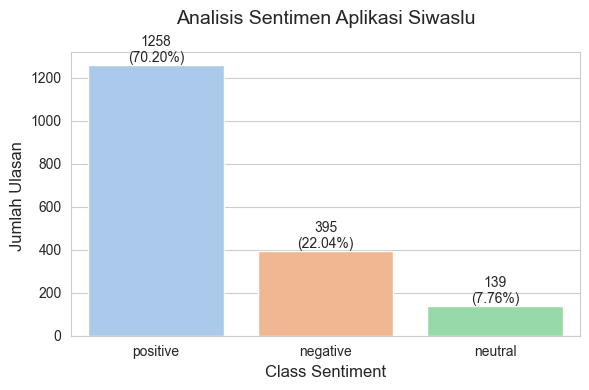

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Hitung jumlah label sentimen
sentiment_count = data['label'].value_counts()

# Atur gaya visualisasi
sns.set_style('whitegrid')

# Buat plot
fig, ax = plt.subplots(figsize=(6, 4))

# Buat barplot
sns.barplot(x=sentiment_count.index, y=sentiment_count.values, hue=sentiment_count.index, palette='pastel', legend=False, ax=ax)

# Judul dan label sumbu
plt.title('Analisis Sentimen Aplikasi Siwaslu', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Ulasan ', fontsize=12)

# Tambahkan persentase ke atas batang
total = len(data['label'])

for i, count in enumerate(sentiment_count.values):
    percentage = f'{100 * count / total:.2f}%'
    ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom')

# Tampilkan plot
plt.tight_layout()
plt.show()